# **Coding Challenge**

- Hypothesis: Poorer countries have more children out of school

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

In [59]:
df = pd.read_csv('./WB_more_data.csv')
df.head(5)

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,19688632,21000256,22645130,29249157,30466479,31541209,40099462,41128771,42239854
1,"Population, total",SP.POP.TOTL,Albania,ALB,3060173,3051010,3039616,2905195,2900401,2895092,2811666,2777689,2745972
2,"Population, total",SP.POP.TOTL,Algeria,DZA,31200985,31624696,32055883,36543541,37260563,38000626,44177969,44903225,45606480
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,58324,58177,57941,54310,53691,52995,45035,44273,43914
4,"Population, total",SP.POP.TOTL,Andorra,AND,67820,70849,73907,70567,71013,71367,79034,79824,80088


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series Name   1085 non-null   object
 1   Series Code   1085 non-null   object
 2   Country Name  1085 non-null   object
 3   Country Code  1085 non-null   object
 4   2001          1085 non-null   object
 5   2002          1085 non-null   object
 6   2003          1085 non-null   object
 7   2011          1085 non-null   object
 8   2012          1085 non-null   object
 9   2013          1085 non-null   object
 10  2021          1085 non-null   object
 11  2022          1085 non-null   object
 12  2023          1085 non-null   object
dtypes: object(13)
memory usage: 110.3+ KB


In [61]:
#rename columns and change type
df.columns = [i.lower().replace(' ', '_') for i in df.columns]
df.columns = ['y_'+i if '2' in i else i for i in df.columns]

In [62]:
for i in [i for i in df.columns if 'y_2' in i]:
    df[i] = pd.to_numeric(df[i], errors = 'coerce')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   series_name   1085 non-null   object 
 1   series_code   1085 non-null   object 
 2   country_name  1085 non-null   object 
 3   country_code  1085 non-null   object 
 4   y_2001        833 non-null    float64
 5   y_2002        845 non-null    float64
 6   y_2003        843 non-null    float64
 7   y_2011        885 non-null    float64
 8   y_2012        895 non-null    float64
 9   y_2013        879 non-null    float64
 10  y_2021        883 non-null    float64
 11  y_2022        798 non-null    float64
 12  y_2023        608 non-null    float64
dtypes: float64(9), object(4)
memory usage: 110.3+ KB


In [64]:
df.series_name.value_counts()

series_name
Population, total                                   217
Children out of school (% of primary school age)    217
Children out of school, primary                     217
GNI per capita, Atlas method (current US$)          217
GNI, Atlas method (current US$)                     217
Name: count, dtype: int64

## **Methodology**

- For the approach, we are going to use GNI per capita, Atlas method (current US$) as an indicator of poor/rich countries and Children out of school (% of primary school age).
- We took both indicators normalized by the population of each country to avoid missleading conclusions that can be caused by different populaiton sizes among countries

In [65]:
df = df.loc[df['series_name'].isin(['Children out of school (% of primary school age)', 'GNI per capita, Atlas method (current US$)'])]
df.sample(5)

,series_name,series_code,country_name,country_code,y_2001,y_2002,y_2003,y_2011,y_2012,y_2013,y_2021,y_2022,y_2023
669,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Belgium,BEL,24460.0,24060.0,27100.0,46490.00000,47130.0000,47900.0,51060.0,53890.0,54530.0
258,Children out of school (% of primary school age),SE.PRM.UNER.ZS,China,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Tonga,TON,1930.0,1910.0,1900.0,3660.00000,4130.0000,4320.0,4970.0,5000.0,NaN
287,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Gabon,GAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Bermuda,BMU,NaN,NaN,NaN,1.66812,0.6773,NaN,NaN,NaN,NaN


<Axes: >

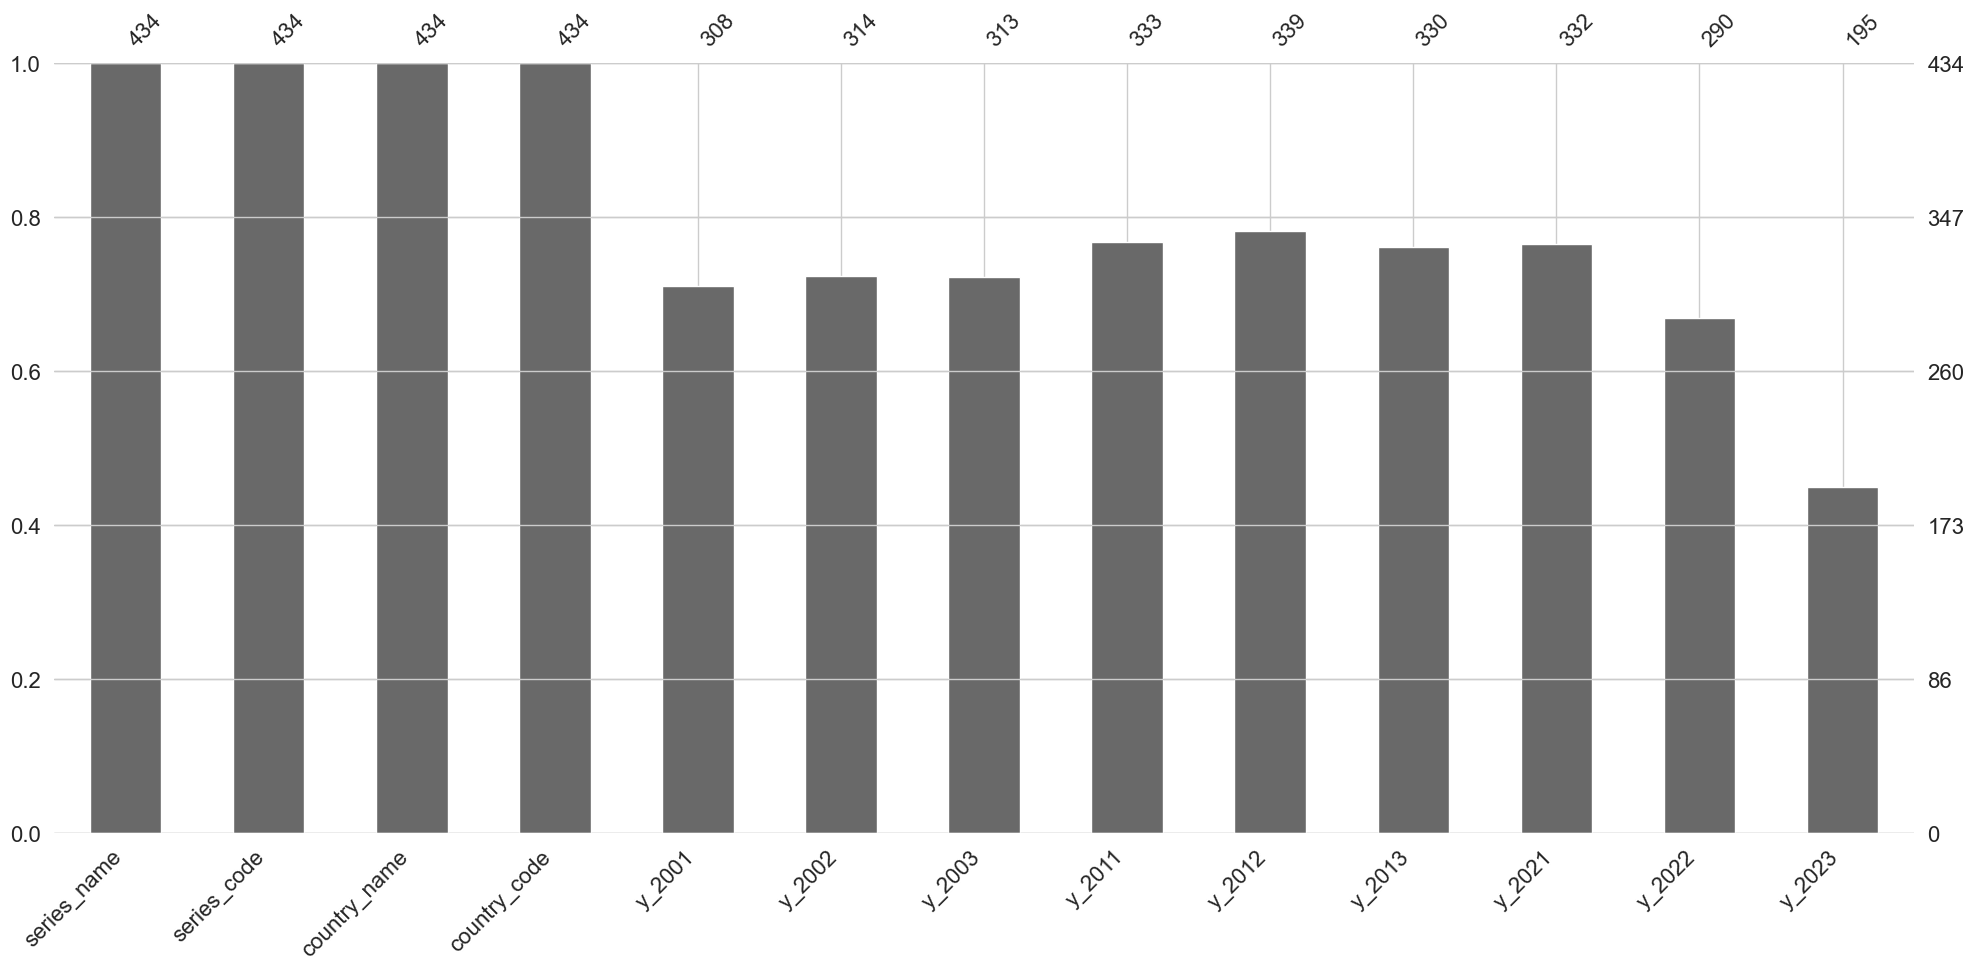

In [66]:
msno.bar(df)

Having seen that there is a lot of discontiunuity in years, we decided to work only with the recent year with less missing values, <code>y_2021</code>

In [67]:
df = df.drop(columns=[i for i in df.columns if 'y_2' in i and i!='y_2021'])
df

,series_name,series_code,country_name,country_code,y_2021
217,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Afghanistan,AFG,NaN
218,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Albania,ALB,6.18712
219,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Algeria,DZA,0.19645
220,Children out of school (% of primary school age),SE.PRM.UNER.ZS,American Samoa,ASM,NaN
221,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Andorra,AND,8.04498
...,...,...,...,...,...
863,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Virgin Islands (U.S.),VIR,NaN
864,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,West Bank and Gaza,PSE,4270.00000
865,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,"Yemen, Rep.",YEM,NaN
866,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Zambia,ZMB,1050.00000


To easily manipulate and plot the series, we decided to reshape the dataframe.

In [68]:
df_melted = pd.melt(df, value_vars=[i for i in df.columns if 'y_2' in i], id_vars=['series_name','country_name'])
df_melted['series_name'] = df_melted['series_name'].replace({'Children out of school (% of primary school age)':'children_oos_2021', 'GNI per capita, Atlas method (current US$)':'gni_pc_2021'})
df_melted = df_melted.rename(columns = {'variable': 'year'})
df_melted.sample(5)

,series_name,country_name,year,value
397,gni_pc_2021,Sri Lanka,y_2021,4020.0
357,gni_pc_2021,New Caledonia,y_2021,37370.0
374,gni_pc_2021,Portugal,y_2021,23960.0
378,gni_pc_2021,Russian Federation,y_2021,11720.0
99,children_oos_2021,Jordan,y_2021,NaN


In [69]:
df_pivot = df_melted.pivot(index = ['country_name'], columns = 'series_name', values = 'value').reset_index()
df_pivot.sample(5)

series_name,country_name,children_oos_2021,gni_pc_2021
141,New Zealand,1.35002,45520.0
182,St. Lucia,3.60100,9690.0
84,Haiti,NaN,1440.0
190,Tajikistan,NaN,1160.0
193,Timor-Leste,NaN,2390.0


In [70]:
df_pivot['gni_interval'] = pd.cut(df_pivot['gni_pc_2021'], bins = 10, labels = [i for i in range(1,11)])
df_pivot.gni_interval.value_counts()

gni_interval
1     128
2      26
3      12
4      10
5       9
6       7
7       3
8       2
10      1
9       0
Name: count, dtype: int64

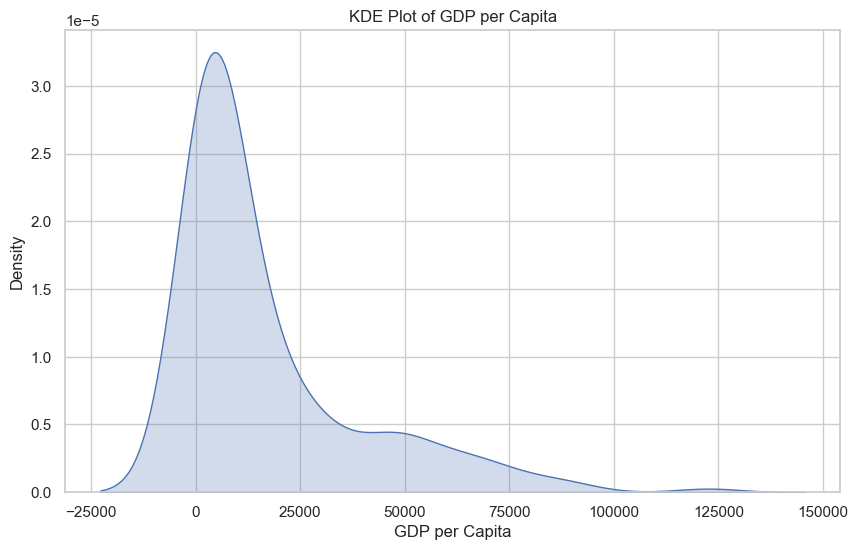

In [71]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_pivot['gni_pc_2021'], fill=True)
plt.title('KDE Plot of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Density')
plt.show()

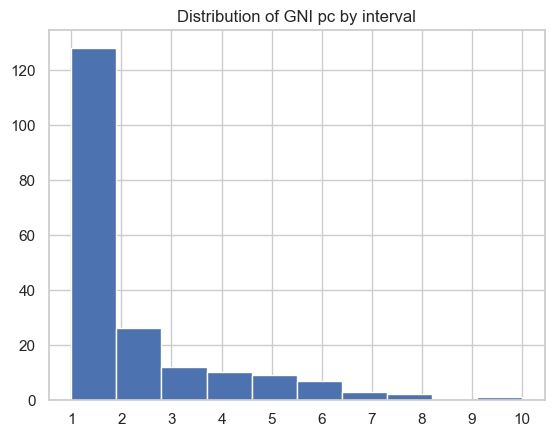

In [72]:
ax = df_pivot.gni_interval.hist(bins=10)
ax.set_title('Distribution of GNI pc by interval')
ax.set_xticks(range(1,11))
plt.show()


In [73]:
df_pivot['gni_decile'] = pd.qcut(df_pivot['gni_pc_2021'], q = 10, labels = [i for i in range(1,11)])
df_pivot.gni_decile.value_counts()

gni_decile
1     20
2     20
3     20
4     20
6     20
8     20
9     20
10    20
5     19
7     19
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation between gni_pc and children_oos for 2021')

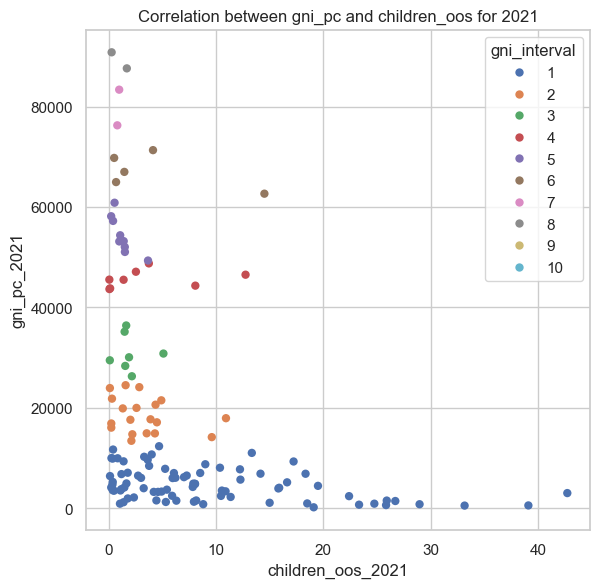

In [74]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="children_oos_2021", y="gni_pc_2021",
                hue="gni_interval",
                sizes=(1, 8), linewidth=0,
                data=df_pivot, ax=ax)
plt.title('Correlation between gni_pc and children_oos for 2021')

In [75]:
df_pivot['gni_pc_2021_ln'] = np.log(df_pivot['gni_pc_2021'])

Text(0.5, 1.0, 'Correlation between gni_pc_ln and children_oos for 2021')

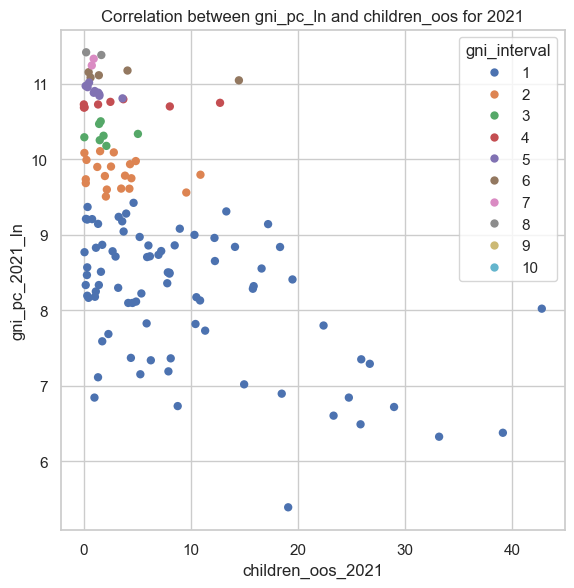

In [76]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="children_oos_2021", y="gni_pc_2021_ln",
                hue="gni_interval",
                sizes=(1, 8), linewidth=0,
                data=df_pivot, ax=ax)
plt.title('Correlation between gni_pc_ln and children_oos for 2021')

Text(0.5, 1.0, 'Correlation between gni_pc_ln and children_oos for 2021')

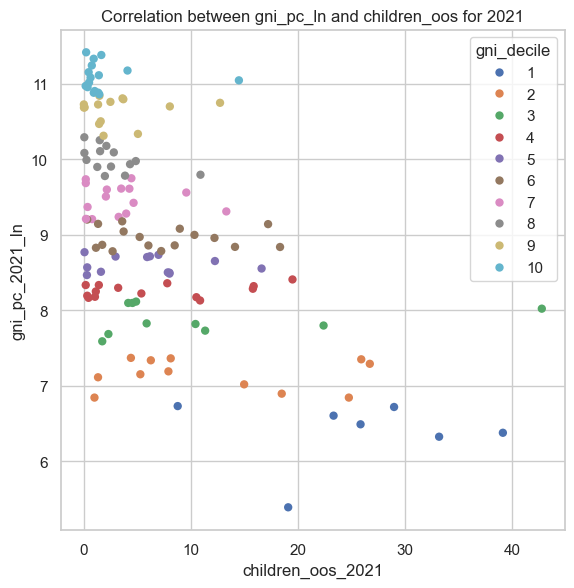

In [77]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="children_oos_2021", y="gni_pc_2021_ln",
                hue="gni_decile",
                sizes=(1, 8), linewidth=0,
                data=df_pivot, ax=ax)
plt.title('Correlation between gni_pc_ln and children_oos for 2021')

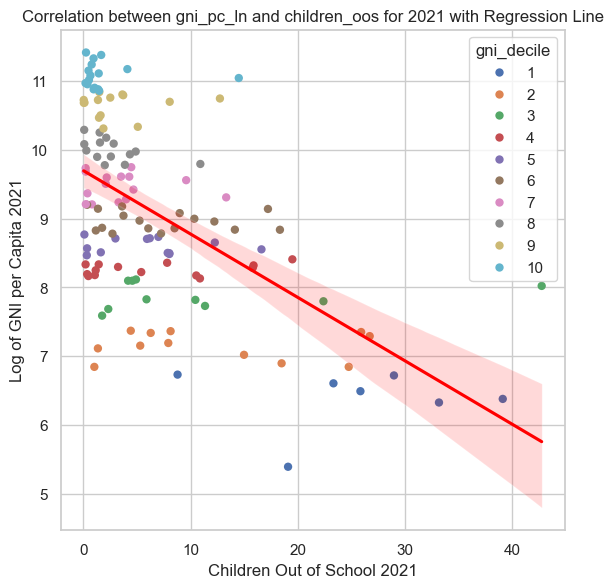

In [78]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="children_oos_2021", y="gni_pc_2021_ln",
                hue="gni_decile", sizes=(1, 8), linewidth=0, data=df_pivot, ax=ax)

sns.regplot(x="children_oos_2021", y="gni_pc_2021_ln", data=df_pivot, scatter=False, ax=ax, color="red")

plt.title('Correlation between gni_pc_ln and children_oos for 2021 with Regression Line')
plt.xlabel('Children Out of School 2021')
plt.ylabel('Log of GNI per Capita 2021')

plt.show()


# **Findings & Limitations**
- We can clearly observe a negative relation between the percentage of children out of school (COOS) and the GNI per capita for 2021.
- It would be interesting to analyze this relationship over time to see if this negative relation persists.
- Another interesting feature to analyze would be the geolocalization of the distribution of GNI PC and (COOS) wth lat long data that we do not have.
- In terms of the GNI pc distribution, it is clearly observed a right skewed distribution, which means a high concentration of low GNI countries.
- There may be many other explanatory variables that affects the children out of school. In terms of the regression line, it's highly possible to have endogeneity problems because of missing variables.
